## SQL Challenge - Bonus

In [1]:
# Pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Tick locating and formatting 
import matplotlib.ticker as tkr

# SQLAlchemy
from sqlalchemy import create_engine

In [2]:
import os

# Read the key-value pair from .env file and add them to environment variable
from dotenv import load_dotenv

In [3]:
# Load database environment variables from .env
load_dotenv()
DB_USER = os.getenv('DB_USER')
DB_PASS = os.getenv('DB_PASS')
DB_IP = os.getenv('DB_IP')
DB_PORT = os.getenv('DB_PORT')

In [4]:
# Create sqlalchemy engine
engine = create_engine(f"postgresql://{DB_USER}:{DB_PASS}@{DB_IP}:{DB_PORT}/sql-challenge")

### Table *salaries*

In [5]:
# Query all records in salaries table and create dataframe
salaries_df= pd.read_sql('SELECT * FROM salaries', engine)
salaries_df.head()

,s_id,emp_no,salary,from_date,to_date
0,3001,10001,60117,1986-06-26,1987-06-26
1,3002,10002,65828,1996-08-03,1997-08-03
2,3003,10003,40006,1995-12-03,1996-12-02
3,3004,10004,40054,1986-12-01,1987-12-01
4,3005,10005,78228,1989-09-12,1990-09-12


In [6]:
# Check for nulls
salaries_df.isnull().sum()

s_id         0
emp_no       0
salary       0
from_date    0
to_date      0
dtype: int64

In [7]:
# Display min and max salaries
print(f"Max: {salaries_df['salary'].max()}")
print(f"Min: {salaries_df['salary'].min()}")

Max: 129492
Min: 40000


In [8]:
# Dimensions
salaries_df.shape

(300024, 5)

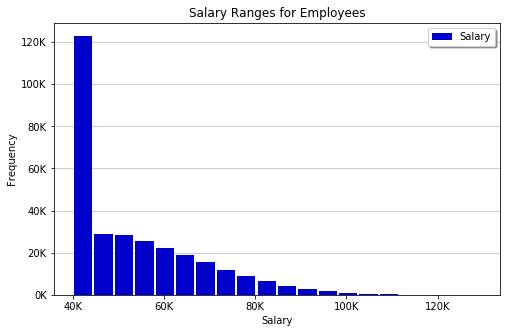

In [9]:
# Generate bar plot
fig, ax = plt.subplots(figsize=(8, 5))
salaries_df['salary'].plot.hist(bins=20,
                                color='mediumblue',
                                alpha=1,
                                rot=0,
                                legend=True,
                                label='Salary',
                                rwidth=0.9,
                                ax=ax)                                       

# Set textual properties
plt.title('Salary Ranges for Employees')
plt.xlabel('Salary')
plt.ylabel('Frequency')

plt.legend(fancybox=True, shadow=True)

# set grid for y axis
ax.set_axisbelow(True)
ax.grid(axis='y', alpha=0.8)

# reformat tick labels with thousand's K and comma separator
ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: f"{x*1e-3:,.0f}K"))
ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: f"{x*1e-3:,.0f}K"))

plt.show()


### Table *titles*

In [10]:
# Query all records in titles table and create dataframe
titles_df= pd.read_sql('SELECT * FROM titles', engine)
titles_df.head()

,t_id,emp_no,title,from_date,to_date
0,5001,10001,Senior Engineer,1986-06-26,9999-01-01
1,5002,10002,Staff,1996-08-03,9999-01-01
2,5003,10003,Senior Engineer,1995-12-03,9999-01-01
3,5004,10004,Engineer,1986-12-01,1995-12-01
4,5005,10004,Senior Engineer,1995-12-01,9999-01-01


In [11]:
# Check for nulls
titles_df.isnull().sum()

t_id         0
emp_no       0
title        0
from_date    0
to_date      0
dtype: int64

In [12]:
# Dimensions
titles_df.shape

(443308, 5)

### Merged tables

In [13]:
# Join (merge) both tables
sbyt_df = pd.merge(salaries_df, titles_df, on='emp_no', how='inner')
sbyt_df.head()

,s_id,emp_no,salary,from_date_x,to_date_x,t_id,title,from_date_y,to_date_y
0,3001,10001,60117,1986-06-26,1987-06-26,5001,Senior Engineer,1986-06-26,9999-01-01
1,3002,10002,65828,1996-08-03,1997-08-03,5002,Staff,1996-08-03,9999-01-01
2,3003,10003,40006,1995-12-03,1996-12-02,5003,Senior Engineer,1995-12-03,9999-01-01
3,3004,10004,40054,1986-12-01,1987-12-01,5004,Engineer,1986-12-01,1995-12-01
4,3004,10004,40054,1986-12-01,1987-12-01,5005,Senior Engineer,1995-12-01,9999-01-01


In [14]:
sbyt_df.shape

(443308, 9)

In [15]:
# Group salary by title and calculate average salary
sbyt_s = round(sbyt_df.groupby('title').salary.mean(),0) 
sbyt_s

title
Assistant Engineer    48493.0
Engineer              48540.0
Manager               51531.0
Senior Engineer       48507.0
Senior Staff          58503.0
Staff                 58465.0
Technique Leader      48581.0
Name: salary, dtype: float64

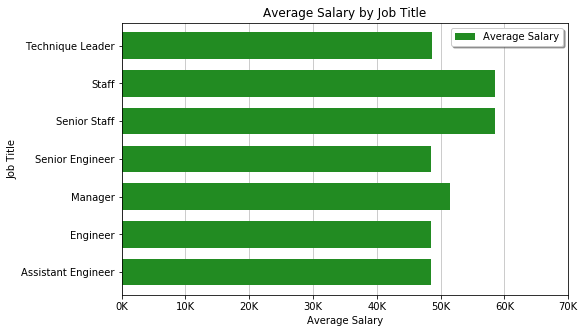

In [16]:
# Generate bar plot
fig, ax = plt.subplots(figsize=(8, 5))
sbyt_s.plot(kind='barh',
                 color='forestgreen',
                 alpha=1,
                 rot=0,
                 legend=True,
                 label='Average Salary',
                 width=0.7,
                 ax=ax)                                       

# Set textual properties
plt.title('Average Salary by Job Title')
plt.xlabel('Average Salary')
plt.ylabel('Job Title')
plt.xlim(0, 70000)
plt.legend(fancybox=True, shadow=True)

# set grid for y axis
ax.set_axisbelow(True)
ax.grid(axis='x', alpha=0.8)

# reformat tick labels with thousand's K and comma separator
ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: f"{x*1e-3:,.0f}K"))

plt.show()